# Objetivo do Laboratório

Permitir um primeiro contato do aluno com um modelo de Machine Learning e parte do seu pipeline básico de execução: 

* Carregamento dos dados
* Pré-processamento dos dados
* Instanciação do modelo  
* Setup de parâmetros
* Treinamento 
* Avaliação do modelo treinado

In [249]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data


--2022-01-24 03:08:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11903 (12K) [application/x-httpd-php]
Saving to: ‘glass.data.3’

glass.data.3        100%[===================>]  11.62K  --.-KB/s    in 0s      

2022-01-24 03:08:58 (120 MB/s) - ‘glass.data.3’ saved [11903/11903]



## Lendo e obtendo informações básicas

In [250]:
#Importando as bibliotecas
import pandas as pd;
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;

In [251]:
df_class = pd.read_csv("glass.data", header = None)
df_class.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [252]:
#Removendo a coluna de id que não será utilizada pelo modelo
df_class.drop(columns=0, inplace=True)

In [253]:
df_class.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [254]:
#Renomeando as colunas
df_class.columns = ["RI", "Na", "Mg", "Al", "Si","K","Ca","Ba","Fe","Type"]

In [255]:
df_class.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [256]:
#Análise Estatísticas dos dados
df_class.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [257]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [258]:
#Visualizando o total de linhas e colunas no dataset.
df_class.shape

(214, 10)

# Dividindo em Treino e Teste

In [259]:
# Importando a biblioteca necessária para realizar a divisão
from sklearn.model_selection import train_test_split

In [260]:
y = df_class['Type']

X = df_class.drop('Type',axis=1)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [262]:
#Visualizando o Total de instancias na base de treinamento
X_train.shape

(136, 9)

In [263]:
#Visualizando o Total de instancias na base de teste
X_test.shape

(43, 9)

In [264]:
#Visualizando o Total de instancias na base de Validação
X_valid.shape

(35, 9)

# Instanciando o modelo 

TODO: Listar aqui alguns parâmetros importantes

In [265]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Treinando o Modelo

In [266]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Avaliando o Modelo

In [267]:
print("Acurácia de treino: ", knn.score(X_train, y_train))
print("Acurácia de teste: ", knn.score(X_test, y_test))
print("Acurácia de Validação: ", knn.score(X_valid, y_valid))

Acurácia de treino:  0.7279411764705882
Acurácia de teste:  0.627906976744186
Acurácia de Validação:  0.6857142857142857


Podemos observar que a acurácia de Teste e Treino possui valores aproximados da acurária de Treino, dessa forma, nosso modelo está apresentando um resultado satisfatório, pois não há sobreajuste na base de treino.

In [268]:
#Salvando a base de dados

In [269]:
df_class.to_csv('Glass_KNN', encoding='utf-8', index=False)

#Implementando LVQ

In [337]:
glass = pd.read_csv('glass.data')

In [338]:
glass.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [339]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [340]:
import csv
import random
import numpy as np
from  scipy import spatial 

random.seed(50)

class LVQ(): 
    def __init__(self, dataset):
        """
        Construtor da classe
        :param nome_arquivo: nome do arquivo csv que contem os dados
        """
        self.dados = dataset
        self.dataset = dataset
        self.qtd_caracteristicas = 0
        self.amplitudes = []
        self.qtd_caracteristicas = len(self.dados[0])-1
        
    def normalizar(self):
        """
        Normalizada todas as caracteristicas para um intervalo de 0 - 1, para todas tenham o mesmo peso na 
        classificacao
        """
        lista = []*(len(self.dados[0])-1)
        self.amplitudes = []
        for caracteristica in range(len(self.dados[0])-1):
            lista = [elemento[caracteristica] for elemento in self.dados]
            self.amplitudes += [[max(lista), min(lista)]]
            for elemento in self.dados:
                elemento[caracteristica] = (elemento[caracteristica] - min(lista))/(max(lista)+min(lista))
        
    def triagem(self, split: float=0.65):
        """
        Divide aleatoriament os elementos do conjunto de dados em dois subconjuntos: teste e treino
        :param split: de 0 a 1 -> 'porcentagem' dos elementos que serao do conjunto de treino
        """        
        self.treino, self.teste = [], []
        for i, elemento in enumerate(self.dados):
            if random.random() < split:
                self.treino += [elemento]
            else:
                self.teste += [elemento]
    
    def resumir(self, n: float=10,  e: float=10, t: float=0.4):
        """
         Retorna o codebook dos dados, ou seja, os elementos que melhor representam o todo
        :param t: taxa de aprendizado inicial
        :param e: numero de epocas
        :param n: numero de elementos do coodbook 
        """
        #Geracao aleatorio dos elementos iniciais do codebook         
        self.codebook = [[]]*n
        for i in range(n):
            self.codebook[i] = [0] * (self.qtd_caracteristicas + 1)
            for caracteristica in range(self.qtd_caracteristicas + 1):
                self.codebook[i][caracteristica] = random.choice(self.dados)[caracteristica]

        for epoca in range(e):
            taxa = t * (1.0-(epoca/float(e)))
            for elemento in self.treino:
                representante = self.encontrar_mais_proximo(elemento, self.codebook)
                o = -1
                if representante[-1] == elemento[-1]:
                    o = 1
                for caracteristica in range(self.qtd_caracteristicas):
                    # print(elemento[caracteristica])
                    # print(representante[caracteristica])
                    erro = (elemento[caracteristica]-representante[caracteristica]) 

                    representante[caracteristica] += (erro * taxa * o)
      
    def testar(self, base=None):
        """
        Executa a classificacao para cada elemento do conjunto teste e retorna a precisao do algoritmo
        """
        base = base or self.teste
        qtd_teste = len(base)
        precisao = 100.0
        for elemento in base: 
            bmu = self.encontrar_mais_proximo(elemento, self.codebook)
            if bmu[-1] != elemento[-1]:
                precisao -= (1/qtd_teste)*100
 
        return precisao
    
    def encontrar_mais_proximo(self, elemento, lista):
        """
        Executa a classificacao para cada elemento do conjunto teste e retorna a precisao do algoritmo
        :param elemento: vetor para o qual deve-se vetor mais proximo de uma dada lista
        :param lista: lista de vetores
        """
        resposta = [lista[0], spatial.distance.euclidean(elemento[0:-1], lista[0][0:-1])]
        for i in lista:
            distancia = spatial.distance.euclidean(elemento[0:-1], i[0:-1])
            if distancia < resposta[1]: 
                resposta = [i, distancia]
        return resposta[0]
    
    @property
    def representantes(self):
        """
        Retorna o codebook "original", com as caracteristicas em seus intervalos originais. Ou seja, 
        retorna o codebook desnormalizado, caso ele tenha sido normalizado
        """
        representantes_desnormalizados = [[]]*len(self.codebook)
        if self.amplitudes:
            for index, representante in enumerate(self.codebook): 
                representante_desnormalizado = []
                for caracteristica in range(self.qtd_caracteristicas):
                    aux = ((self.amplitudes[caracteristica][0] + self.amplitudes[caracteristica][1])\
                          * representante[caracteristica]) + self.amplitudes[caracteristica][1]
                    representante_desnormalizado += [aux]
                representante_desnormalizado += [representante[-1]]    
                representantes_desnormalizados[index] = representante_desnormalizado
        else: 
            return self.codebook
        
        return representantes_desnormalizados
    
    @property
    def classes(self): 
        """
        Retorna as classes do dataset
        """
        classes = []
        for elemento in self.dados:
            if elemento[-1] not in classes:
                classes.append(elemento[-1])
        
        return classes

#Adicionando outras funções

In [341]:
import random 


def importar_dataset(arquivo_csv: str=None):
        """
        Carrega os dados iniciais da classe através de um arquivo csv. Esperar-se um arquivo possua linhas
        com n colunas, de modo que a n-ézima represente a classe do elemento e as anteriores representem, 
        cada uma, uma caracteristica diferente.
        :param arquivo_csv: nome do arquivo csv
        """

        dados = []
        with open(arquivo_csv, 'r') as arquivo_csv:
            arquivo = csv.reader(arquivo_csv)
            for index, linha in enumerate(arquivo):
                if linha:
                    dados += [list(map(float, linha[0:-1]))]
                    dados[index] += [linha[-1]]
        return dados


def random_cores(qtd: int=3): 
    """
    Retorna aleatoriamente cores no formato hexadecimal de acordo com a quantidade pedida
    """
    lista = [(210,180,140), (139,69,19), (244,164,96), (85,107,47), (0,255,0), (102,205,170), (127,255,212),
            (72,209,204), (0,255,255), (176,196,222), (30,144,255), (0,0,255), (220,20,60), (255,105,180), 
             (255,0,255), (139,0,139), (255,192,203), (255,0,0), (250,128,114), (255,165,0), (255,255,0)]
    
    random.shuffle(lista)
    cores = lista[0:qtd]
    resposta = []
    for cor in cores:
        resposta += ['#%02x%02x%02x' % cor]
    return resposta

#Aplicação da classe LVQ na classificação do conjunto de dados da Glass

In [342]:
import matplotlib.pyplot as plt
import numpy as np

dataset = importar_dataset('glass.data')

print(dataset)

[[1.0, 1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0, '1'], [2.0, 1.51761, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0, '1'], [3.0, 1.51618, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0, '1'], [4.0, 1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0, '1'], [5.0, 1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0, '1'], [6.0, 1.51596, 12.79, 3.61, 1.62, 72.97, 0.64, 8.07, 0.0, 0.26, '1'], [7.0, 1.51743, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0, '1'], [8.0, 1.51756, 13.15, 3.61, 1.05, 73.24, 0.57, 8.24, 0.0, 0.0, '1'], [9.0, 1.51918, 14.04, 3.58, 1.37, 72.08, 0.56, 8.3, 0.0, 0.0, '1'], [10.0, 1.51755, 13.0, 3.6, 1.36, 72.99, 0.57, 8.4, 0.0, 0.11, '1'], [11.0, 1.51571, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24, '1'], [12.0, 1.51763, 12.8, 3.66, 1.27, 73.01, 0.6, 8.56, 0.0, 0.0, '1'], [13.0, 1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24, '1'], [14.0, 1.51748, 12.86, 3.56, 1.27, 73.21, 0.54, 8.38, 0.0, 0.17, '1'], [15.0, 1.51763, 12.61, 3.59, 1.31, 

In [346]:
# Dados normalizados
print("Algoritmo com os dados normalizados entre 0 - 1")

glass_norm = LVQ(dataset)

glass_norm.triagem(0.75)

glass_norm.normalizar()

glass_norm.resumir(n=80, e=13, t=0.5)

print("Precisão: ", glass_norm.testar(), "% \n")


Algoritmo com os dados normalizados entre 0 - 1
Precisão:  89.39393939393939 % 



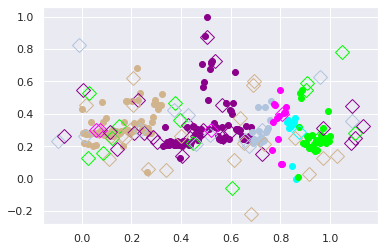

Algoritmo com os dados não normalizados
Precisão:  70.0 % 



In [347]:
classes = glass_norm.classes

classes_cor = {}
cores = random_cores(len(classes))
for index, classe in enumerate(classes):
    classes_cor[classe] = cores[index]
    
for elemento in glass_norm.dataset:
    plt.plot(elemento[0], elemento[1], 'o', color=classes_cor[elemento[-1]])

for representante in glass_norm.codebook: 
    plt.plot(representante[0], representante[1], 'D' , ms=10, mfc='none', color=classes_cor[representante[-1]])

plt.show()
    
# Sem normalização 
print("Algoritmo com os dados não normalizados")

glass = LVQ(dataset)
glass.triagem(0.75)

glass.resumir(n=80, e=13, t=0.5)

print("Precisão: ", glass.testar(),"% \n")

Observa-se que alcançamos a melhor precisão quando a base de dados foi normalizada, chegando a uma precisão próxima de 90%.

#Tuning da quantidade de protótipos

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = [x[:-1] for x in dataset]
y = [x[-1] for x in dataset]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state=42, stratify=y_train)

# Normalizando os dados por fora
X_train = minmax_scale(X_train).tolist()
X_test = minmax_scale(X_test).tolist()
X_valid = minmax_scale(X_valid).tolist()

# Reconstituindo o dataset no formato compreendido pela classe
dataset_train = [x+[y_] for x, y_ in zip(X_train, y_train)]
dataset_test = [x+[y_] for x, y_ in zip(X_test, y_test)]
dataset_valid = [x+[y_] for x, y_ in zip(X_valid, y_valid)]

n_range = range(1, 100)

n_scores_train = []
n_scores_valid = []


for n in n_range:
    random.seed(100) # Resetando a seed para garantir uma comparação justa
    lvq = LVQ(dataset_train)

    lvq.triagem(1)#
    
    lvq.normalizar()
    
    lvq.resumir(n=n, e=13, t=0.7)

    n_scores_train.append(lvq.testar(lvq.treino))   
    n_scores_valid.append(lvq.testar(dataset_valid))
   

best_values = max(zip(n_range, n_scores_train, n_scores_valid), key=lambda v:v[-1])

best_n, best_acc_train, best_acc_valid = best_values

print("Melhor quantidade protótipos: ", best_n)
print("Melhor acurárica de treino: ", best_acc_train)
print("Melhor acurárica de validação: ", best_acc_valid)

Melhor quantidade protótipos:  69
Melhor acurárica de treino:  83.08823529411767
Melhor acurárica de validação:  82.85714285714283


#Treinamento com melhor quantidade de protótipos

In [349]:
random.seed(100)
lvq = LVQ(dataset_train)
lvq.triagem(1)
lvq.normalizar()
lvq.resumir(n=best_n, e=13, t=0.5)

print("Acurárica de teste: ", lvq.testar(dataset_test))

Acurárica de teste:  69.76744186046515
